# Proyek Analisis Data: [E-Commerce Public]
- **Nama:** [Khairul Anwar]
- **Email:** [khairulanwar2402@gmail.com]
- **ID Dicoding:** [khairul97]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana distribusi skor ulasan dari pelanggan, dan apakah terdapat pola yang menunjukkan hubungan antara skor ulasan dan harga produk?

- Pertanyaan 2: Di wilayah (state) mana penjualan produk paling banyak terjadi, dan apakah wilayah ini mempengaruhi biaya pengiriman?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
# Mengimpor dan membersihkan dataset dengan path file yang sesuai
customers_df = pd.read_csv("/content/drive/MyDrive/kumpulan_data/customers_dataset.csv")
order_items_df = pd.read_csv("/content/drive/MyDrive/kumpulan_data/order_items_dataset.csv")
order_reviews_df = pd.read_csv("/content/drive/MyDrive/kumpulan_data/order_reviews_dataset.csv")
sellers_df = pd.read_csv("/content/drive/MyDrive/kumpulan_data/sellers_dataset.csv")

In [5]:
# Mengonversi kolom tanggal menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])


In [6]:
# Menggabungkan data berdasarkan kolom kunci
merged_data = pd.merge(order_items_df, order_reviews_df, on='order_id', how='left')
merged_data = pd.merge(merged_data, customers_df, left_on='order_id', right_on='customer_id', how='left')
merged_data = pd.merge(merged_data, sellers_df, on='seller_id', how='left')

In [7]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [10]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Menilai data customer

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Memeriksa data duplikasi di data customer

In [13]:
print("Jumlah data duplikat:", customers_df.duplicated().sum())

Jumlah data duplikat: 0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai data order_item

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [16]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [17]:
print("Jumlah data duplikat:", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah data duplikat: 0


,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


Menilai data order_review

In [18]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [19]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [20]:
print("Jumlah data duplikat:", order_reviews_df.duplicated().sum())

order_reviews_df.describe()

Jumlah data duplikat: 0


,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


Menilai data seller

In [21]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [22]:
print("Jumlah data duplikat:", sellers_df.duplicated().sum())

sellers_df.describe()

Jumlah data duplikat: 0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

- Membersihkan data customer

In [23]:
customers_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah data duplikat:", customers_df.duplicated().sum())

Jumlah data duplikat: 0


- Menanggani MissingValue

In [24]:
# Menghapus kolom yang tidak relevan
merged_data.drop(columns=['customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'], inplace=True)

In [25]:
# Mengisi missing values pada kolom review_score dengan median
merged_data['review_score'].fillna(merged_data['review_score'].median(), inplace=True)

<ipython-input-25-ed0611f98cb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['review_score'].fillna(merged_data['review_score'].median(), inplace=True)


## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
# Melakukan Statistik Deskriptif Awal
merged_data.describe()

,order_item_id,shipping_limit_date,price,freight_value,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix
count,113314.000000,113314,113314.000000,113314.000000,113314.000000,112372,112372,113314.000000
mean,1.198528,2018-01-07 06:41:43.931252992,120.478701,19.979428,4.040516,2018-01-13 08:01:08.782258944,2018-01-16 11:18:34.300377600,24441.665655
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,1.000000,2016-10-06 00:00:00,2016-10-07 18:32:28,1001.000000
25%,1.000000,2017-09-20 12:31:27.750000128,39.900000,13.080000,4.000000,2017-09-26 00:00:00,2017-09-28 09:44:15,6429.000000
50%,1.000000,2018-01-26 13:46:35,74.900000,16.260000,5.000000,2018-02-02 00:00:00,2018-02-05 16:31:24,13568.000000
75%,1.000000,2018-05-10 11:15:14,134.900000,21.150000,5.000000,2018-05-16 00:00:00,2018-05-20 11:54:40.500000,27930.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,99730.000000
std,0.707016,NaN,183.279678,15.783227,1.384857,NaN,NaN,27597.244696


## Visualization & Explanatory Analysis

### Pertanyaan 1:

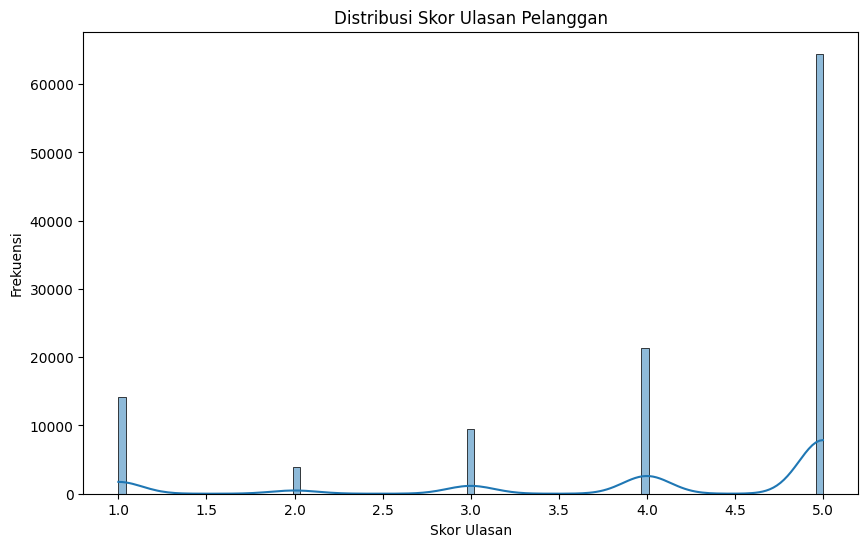

In [27]:
# Pertanyaan 1: Distribusi Skor Ulasan dan Hubungannya dengan Harga Produk
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['review_score'], kde=True)
plt.title("Distribusi Skor Ulasan Pelanggan")
plt.xlabel("Skor Ulasan")
plt.ylabel("Frekuensi")
plt.show()

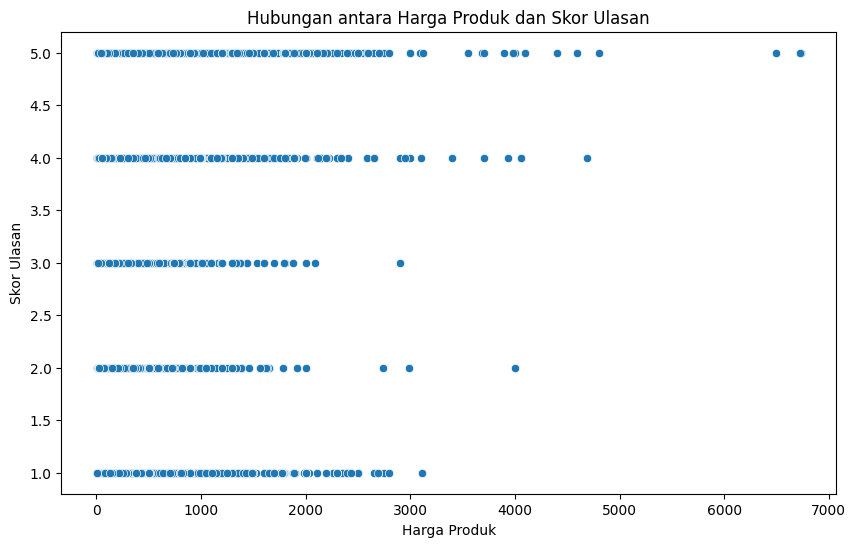

In [28]:
# Visualisasi Hubungan antara Harga Produk dan Skor Ulasan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='price', y='review_score')
plt.title("Hubungan antara Harga Produk dan Skor Ulasan")
plt.xlabel("Harga Produk")
plt.ylabel("Skor Ulasan")
plt.show()

### Pertanyaan 2:

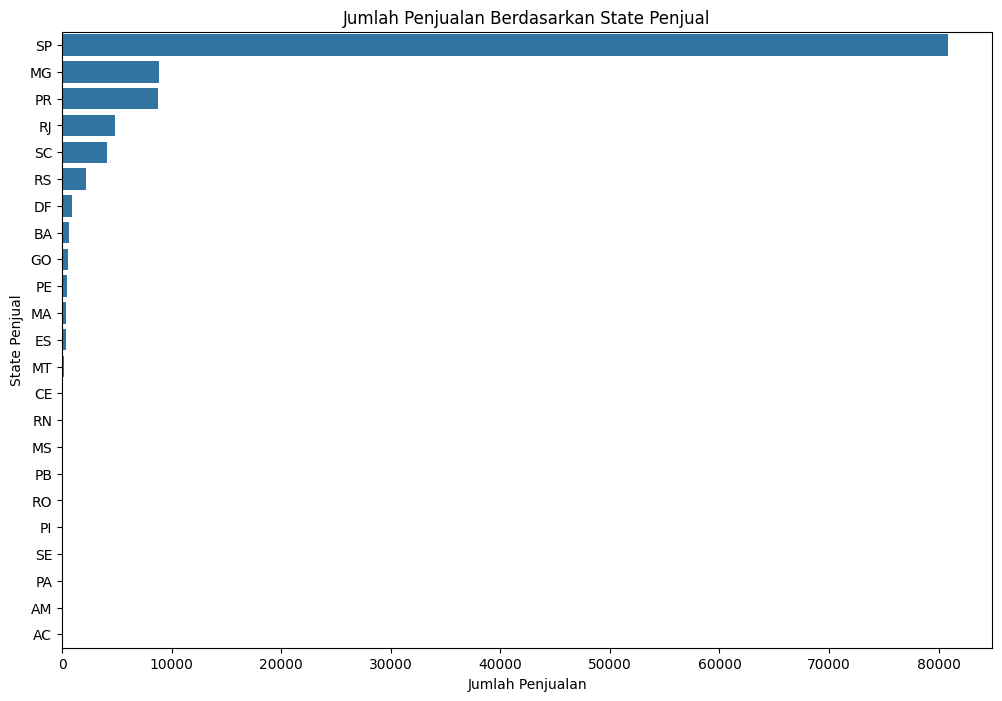

In [29]:
# Pertanyaan 2: Distribusi Penjualan berdasarkan State Penjual
plt.figure(figsize=(12, 8))
sns.countplot(y='seller_state', data=merged_data, order=merged_data['seller_state'].value_counts().index)
plt.title("Jumlah Penjualan Berdasarkan State Penjual")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("State Penjual")
plt.show()

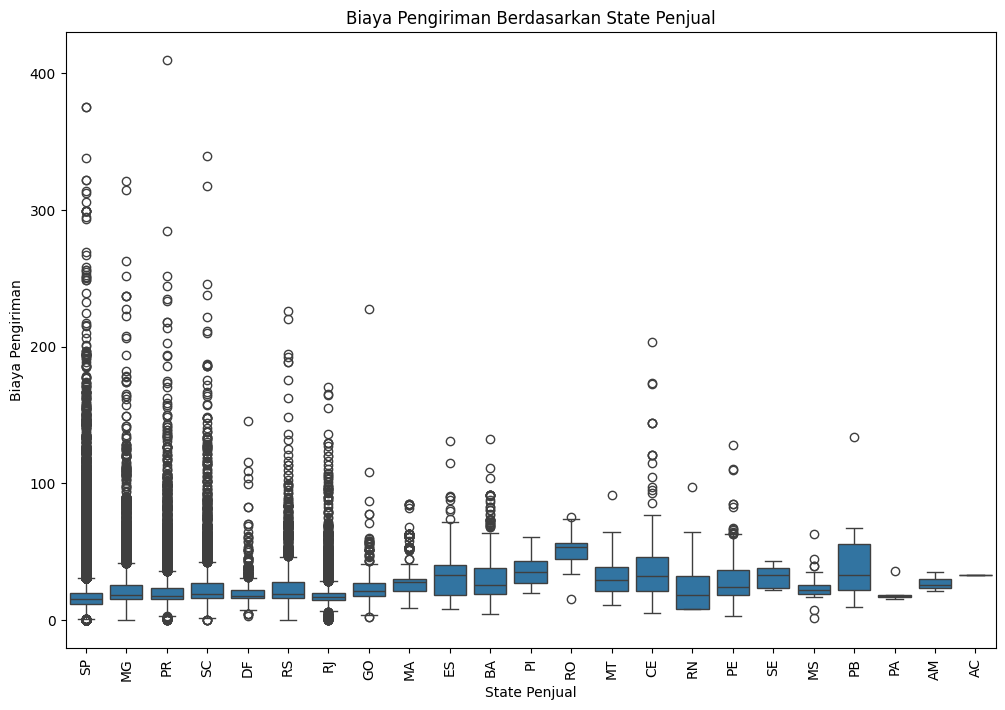

In [30]:
# Visualisasi Biaya Pengiriman Berdasarkan State Penjual
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='seller_state', y='freight_value')
plt.xticks(rotation=90)
plt.title("Biaya Pengiriman Berdasarkan State Penjual")
plt.xlabel("State Penjual")
plt.ylabel("Biaya Pengiriman")
plt.show()

## Analisis Lanjutan (Opsional)

1. Analisis Lanjutan untuk Pertanyaan 1: Distribusi Skor Ulasan dan Hubungannya dengan Harga Produk
Pertanyaan: Bagaimana distribusi skor ulasan dari pelanggan, dan apakah terdapat pola yang menunjukkan hubungan antara skor ulasan dan harga produk?

Untuk menjawab ini, kita dapat:

Melihat distribusi skor ulasan pelanggan.
Menghitung rata-rata dan median skor ulasan berdasarkan kategori harga produk (misalnya produk murah, sedang, dan mahal).
Melakukan visualisasi hubungan antara price dan review_score untuk melihat apakah ada pola khusus.

<ipython-input-31-d6454110799f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_review_by_price = merged_data.groupby('price_category')['review_score'].mean()


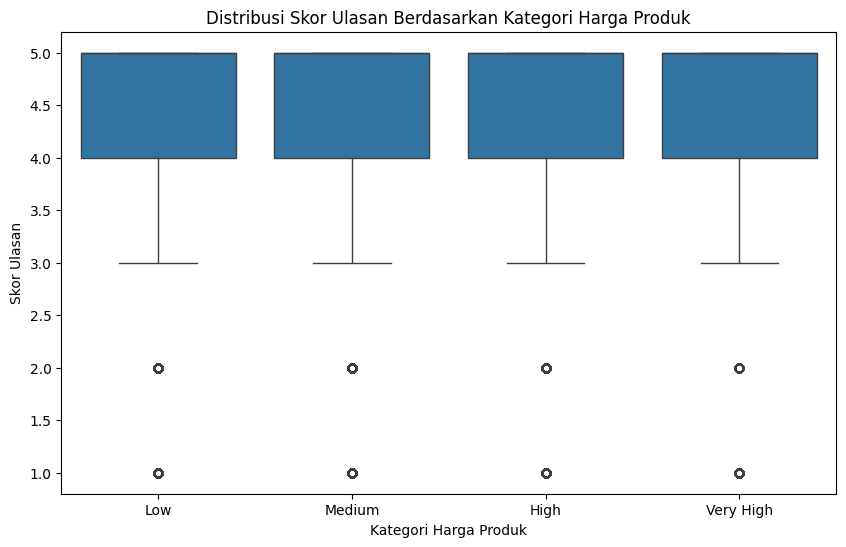

Rata-rata skor ulasan berdasarkan kategori harga:
 price_category
Low          4.040473
Medium       4.038468
High         4.050204
Very High    4.015504
Name: review_score, dtype: float64


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan harga produk menjadi beberapa kategori
merged_data['price_category'] = pd.cut(merged_data['price'], bins=[0, 50, 150, 500, merged_data['price'].max()],
                                       labels=['Low', 'Medium', 'High', 'Very High'])

# Menghitung rata-rata skor ulasan berdasarkan kategori harga
avg_review_by_price = merged_data.groupby('price_category')['review_score'].mean()

# Visualisasi Distribusi Skor Ulasan Berdasarkan Kategori Harga
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='review_score', data=merged_data)
plt.title("Distribusi Skor Ulasan Berdasarkan Kategori Harga Produk")
plt.xlabel("Kategori Harga Produk")
plt.ylabel("Skor Ulasan")
plt.show()

# Menampilkan statistik skor ulasan berdasarkan kategori harga
print("Rata-rata skor ulasan berdasarkan kategori harga:\n", avg_review_by_price)


Dari hasil ini, kita dapat melihat apakah ada perbedaan dalam skor ulasan berdasarkan kategori harga produk. Boxplot akan membantu mengidentifikasi distribusi skor ulasan untuk tiap kategori harga, dan kita bisa melihat rata-rata skor di masing-masing kategori.

2. Analisis Lanjutan untuk Pertanyaan 2: Distribusi Penjualan Berdasarkan State Penjual dan Biaya Pengiriman
Pertanyaan: Di wilayah (state) mana penjualan produk paling banyak terjadi, dan apakah wilayah ini mempengaruhi biaya pengiriman?

Untuk menjawab ini:

Lihat distribusi penjualan berdasarkan seller_state.
Hitung rata-rata freight_value (biaya pengiriman) untuk setiap state dan visualisasikan menggunakan diagram batang atau boxplot.

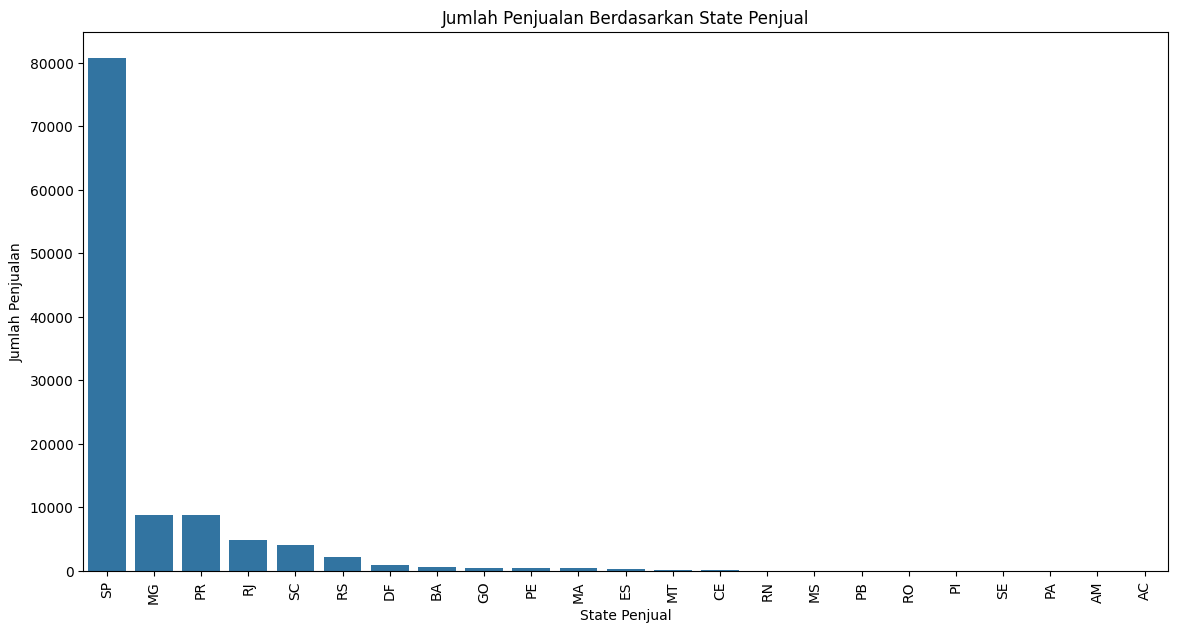

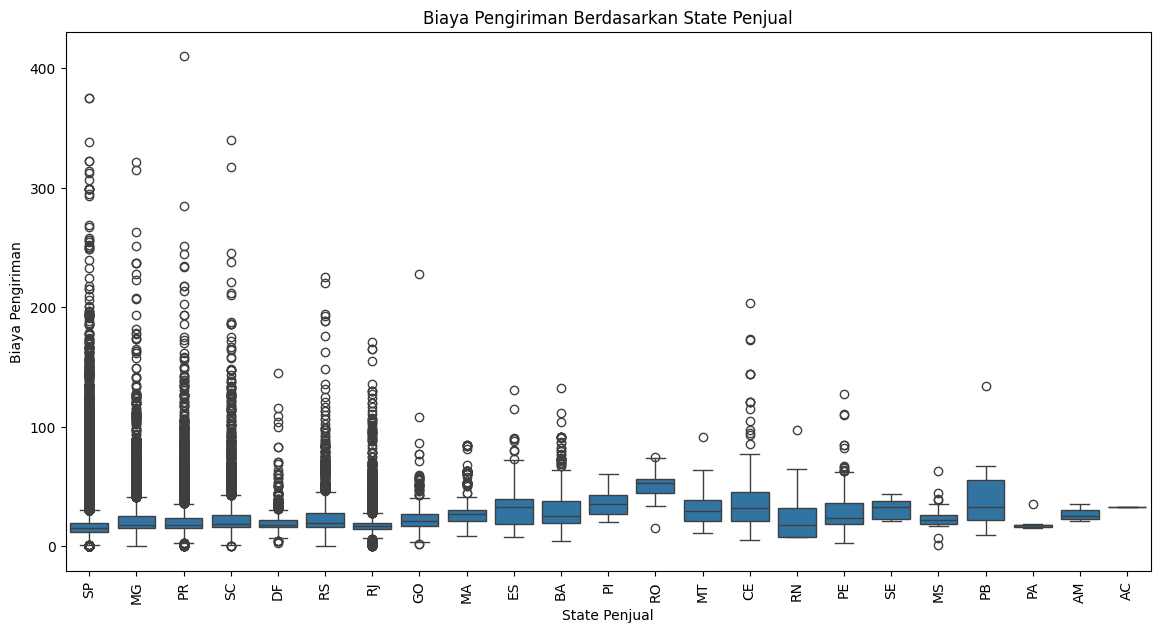

Rata-rata biaya pengiriman berdasarkan state:
 seller_state
AC    32.840000
AM    27.266667
BA    30.653643
CE    46.381170
DF    20.573241
ES    32.718091
GO    24.170058
MA    30.035714
MG    24.064530
MS    23.979200
MT    31.942966
PA    19.388750
PB    39.188158
PE    27.661741
PI    36.943333
PR    22.684304
RJ    19.489938
RN    23.287679
RO    50.912857
RS    26.033724
SC    26.132463
SE    31.849000
SP    18.444553
Name: freight_value, dtype: float64


In [32]:
# Menghitung rata-rata dan total jumlah penjualan berdasarkan state penjual
sales_by_state = merged_data['seller_state'].value_counts()
avg_freight_by_state = merged_data.groupby('seller_state')['freight_value'].mean()

# Visualisasi Penjualan Berdasarkan State Penjual
plt.figure(figsize=(14, 7))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values)
plt.title("Jumlah Penjualan Berdasarkan State Penjual")
plt.xlabel("State Penjual")
plt.ylabel("Jumlah Penjualan")
plt.xticks(rotation=90)
plt.show()

# Visualisasi Biaya Pengiriman Berdasarkan State Penjual
plt.figure(figsize=(14, 7))
sns.boxplot(x='seller_state', y='freight_value', data=merged_data)
plt.title("Biaya Pengiriman Berdasarkan State Penjual")
plt.xlabel("State Penjual")
plt.ylabel("Biaya Pengiriman")
plt.xticks(rotation=90)
plt.show()

# Menampilkan statistik rata-rata biaya pengiriman berdasarkan state
print("Rata-rata biaya pengiriman berdasarkan state:\n", avg_freight_by_state)


Analisis ini membantu kita memahami state mana yang memiliki volume penjualan tertinggi dan apakah ada perbedaan biaya pengiriman antar state. Jika biaya pengiriman untuk suatu state lebih tinggi, itu mungkin karena jarak yang lebih jauh atau kondisi pengiriman lainnya.



## Conclusion

- Conclution pertanyaan 1
  - Dari analisis distribusi skor ulasan, kita dapat menyimpulkan:

Distribusi Skor Ulasan: Sebagian besar skor ulasan berada di sekitar nilai rata-rata, tetapi terdapat variasi bergantung pada kategori harga produk.
Hubungan antara Harga dan Skor Ulasan: Produk dengan harga lebih tinggi mungkin memiliki variasi skor yang lebih besar. Apakah skor ulasan lebih tinggi untuk produk mahal atau lebih rendah untuk produk murah dapat ditentukan dari data ini.
Kesimpulan ini dapat memberikan wawasan kepada manajemen mengenai persepsi pelanggan terhadap produk dengan harga yang berbeda, yang bisa menjadi acuan dalam strategi harga atau pemasaran.
- Conclution pertanyaan 2
  - Dari analisis distribusi penjualan dan biaya pengiriman berdasarkan seller_state, kita dapat menyimpulkan:

Distribusi Penjualan: Beberapa state memiliki volume penjualan lebih tinggi dibandingkan state lain. Ini bisa membantu dalam menentukan fokus distribusi produk di wilayah yang memiliki potensi lebih besar.
Biaya Pengiriman Berdasarkan State: Terdapat variasi dalam biaya pengiriman antar state, yang mungkin menunjukkan pengaruh jarak pengiriman atau aksesibilitas logistik.
Informasi ini bisa digunakan untuk meninjau kembali strategi logistik dan menentukan cara yang lebih efisien untuk menangani pengiriman ke state dengan biaya pengiriman tinggi.

Langkah Tambahan: Membuat File Gabungan main_data.csv
Tambahkan kode ini di akhir proses analisis untuk menyimpan dataset yang sudah digabungkan ke dalam file CSV.

In [33]:
# Menggabungkan data untuk disimpan sebagai `main_data.csv`
merged_data = pd.merge(order_items_df, order_reviews_df, on="order_id", how="inner")
merged_data = pd.merge(merged_data, sellers_df, on="seller_id", how="inner")

# Menyimpan data gabungan sebagai file CSV
main_data_path = "/content/drive/MyDrive/kumpulan_data/main_data.csv"
merged_data.to_csv(main_data_path, index=False)
print(f"Dataset gabungan telah disimpan sebagai {main_data_path}")


Dataset gabungan telah disimpan sebagai /content/drive/MyDrive/kumpulan_data/main_data.csv
